In [ ]:
import numpy as np

class Neuron():

    def __init__(self):
        self.state = 0 
        self.out_neighbors = []
        self.in_neighbors = []

    def add_out_neighbor(self, neighbor, weight):
        self.out_neighbors.append((neighbor, weight))
        neighbor.in_neighbors.append((self, weight))

    def __repr__(self):
        return f'Neuron({self.state})'
    

def Network()
    
    def __init__(self):
        self.neurons = []

In [9]:
n = Neuron()
m = Neuron()
n.add_out_neighbor(m, 0.5)

In [10]:
n.out_neighbors

[(Neuron(0), 0.5)]

In [11]:
import networkx as nx

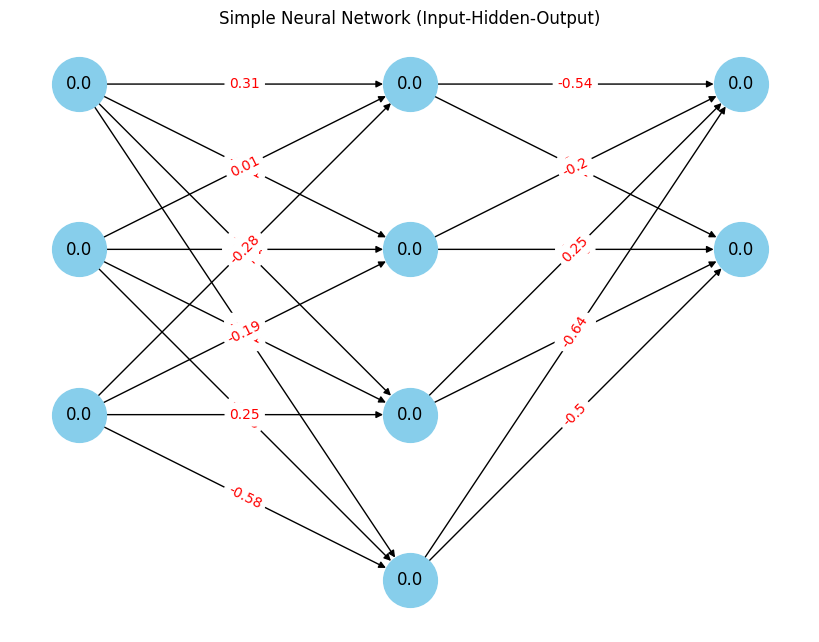

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Define layer sizes
input_size = 3
hidden_size = 4
output_size = 2

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each layer
input_nodes = [f"I{i}" for i in range(input_size)]
hidden_nodes = [f"H{i}" for i in range(hidden_size)]
output_nodes = [f"O{i}" for i in range(output_size)]

for node in input_nodes:
    G.add_node(node, layer="input", state=0.0)

for node in hidden_nodes:
    G.add_node(node, layer="hidden", state=0.0)

for node in output_nodes:
    G.add_node(node, layer="output", state=0.0)


# Connect input -> hidden
for i in input_nodes:
    for h in hidden_nodes:
        weight = round(np.random.uniform(-1, 1), 2)  # random weight between -1 and 1
        G.add_edge(i, h, weight=weight)

# Connect hidden -> output
for h in hidden_nodes:
    for o in output_nodes:
        weight = round(np.random.uniform(-1, 1), 2)  # random weight between -1 and 1
        G.add_edge(h,o, weight=weight)


pos = {}
layer_gap = 3
for i, node in enumerate(input_nodes):
    pos[node] = (0, -i)
for i, node in enumerate(hidden_nodes):
    pos[node] = (layer_gap, -i)
for i, node in enumerate(output_nodes):
    pos[node] = (2*layer_gap, -i)


# Draw
plt.figure(figsize=(8,6))
nx.draw(G, pos, node_size=1500, node_color="skyblue", arrows=True)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

node_labels = {n: f"{G.nodes[n]['state']}" for n in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)


plt.title("Simple Neural Network (Input-Hidden-Output)")
plt.show()

In [45]:
def forward_pass(G, input=[1,1,1]):
    G.nodes['I0']['state'] = input[0]
    G.nodes['I1']['state'] = input[1]
    G.nodes['I2']['state'] = input[2]

    # Forward pass
    for h in hidden_nodes:
        G.nodes[h]['state'] = int(sum(G.nodes[i]['state'] * G[i][h]['weight'] for i in input_nodes) > 0)

    for o in output_nodes:
        G.nodes[o]['state'] = int(sum(G.nodes[h]['state'] * G[h][o]['weight'] for h in hidden_nodes) > 0)

def plot(G):
    # Draw
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, node_size=1500, node_color="skyblue", arrows=True)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

    node_labels = {n: f"{G.nodes[n]['state']}" for n in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=node_labels)


    plt.title("Simple Neural Network (Input-Hidden-Output)")
    plt.show()

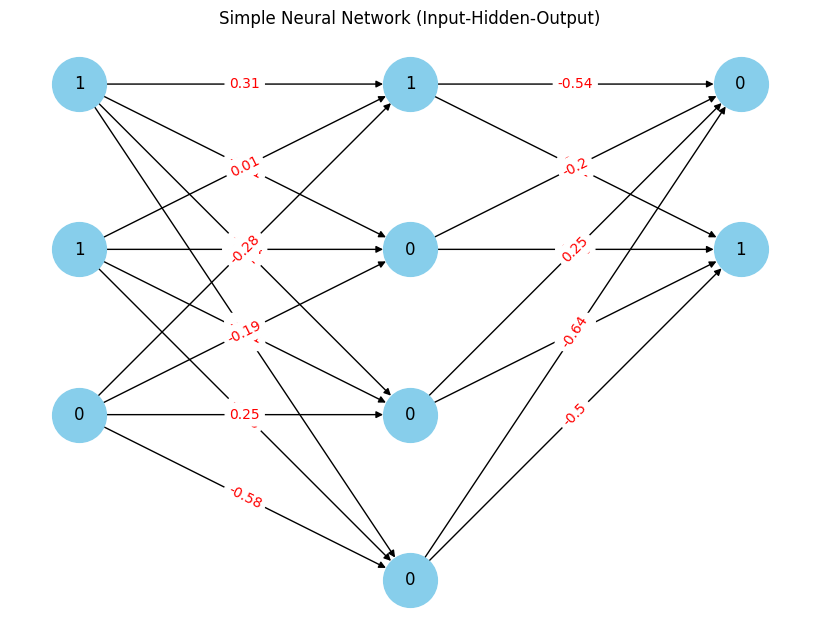

In [48]:
forward_pass(G, input=[1,1,0])
plot(G)

In [ ]:
def train(G, data):
    for input_vector, target in data:
        forward_pass(G, input=input_vector)
        